In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def read_results(file):
    with open(file, "r") as f:
        lines = f.readlines()
    
    models = ["EASE", "AbsEASE"]
    inputs = ["pos_inputs", "pos_neg_inputs"]
    metrics = ["recall_liked", "recall_disliked", "ndcg"]
    
    current_model = None
    current_input = None
    results_dict = {mod: {inp: {met: {} for met in metrics} for inp in inputs} for mod in models}
    for l in lines:
        l = l.strip()
        if l == models[0] or l == models[1]:
            current_model = l.strip()
        elif l == inputs[0] or l == inputs[1]:
            current_input = l.strip()
        elif l.startswith("recall_liked") or l.startswith("recall_disliked") or l.startswith("ndcg"):
            [metric, res] = l.split(": ")
            [metric_name, k] = metric.split(" @ ")
            metric_name = metric_name.strip()
            k = int(k)
            [mean, se] = res.split(" +- ")
            mean = float(mean)
            se = float(se)
            results_dict[current_model][current_input][metric_name][k] = (mean, se)
    
    results_ease = results_dict["EASE"]
    results_abs_ease = results_dict["AbsEASE"]
    
    ks = list(results_ease["pos_inputs"]["recall_liked"].keys())
    dfs = []
    for model_name in models:
        for input_name in inputs:
            for metric_name in metrics:
                mean = [results_dict[model_name][input_name][metric_name][k][0] for k in ks]
                se = [results_dict[model_name][input_name][metric_name][k][1] for k in ks]
                df = pd.DataFrame({
                    "model": model_name,
                    "input": input_name,
                    "metric": metric_name,
                    "k": ks,
                    "mean": mean,
                    "se": se
                })
                dfs.append(df)
    
    results_df = pd.concat(dfs)
    
    return results_df

In [3]:
def plot_results(results_df, metric):
    fig, ax = plt.subplots(figsize=(10,10))
    plt.title(f"{metric}")
    for model in "EASE", "AbsEASE":
        for inputs in "pos_inputs", "pos_neg_inputs":
            _df = results_df[
                (results_df["model"] == model) &
                (results_df["input"] == inputs) &
                (results_df["metric"] == metric)
            ]
            x = _df["k"]
            y = _df["mean"]
            e = _df["se"]
            y_min = y - e
            y_max = y + e
            plt.fill_between(x, y_min, y_max, alpha=0.5)
            plt.errorbar(x, y, e, fmt='-o', label=f"{model} {inputs}")
    plt.xlabel("k")
    plt.ylabel(metric)

    plt.legend()

    plt.show()

# BeerAdvocate

In [4]:
results_file_beeradvocate = "resultsBeerAdvocate.txt"

beeradvocate_results_df = read_results(results_file_beeradvocate)

beeradvocate_results_df

,model,input,metric,k,mean,se
0,EASE,pos_inputs,recall_liked,10,0.025051,0.000718
1,EASE,pos_inputs,recall_liked,20,0.042926,0.000927
2,EASE,pos_inputs,recall_liked,50,0.086557,0.001457
3,EASE,pos_inputs,recall_liked,100,0.137731,0.002023
4,EASE,pos_inputs,recall_liked,200,0.213201,0.002656
...,...,...,...,...,...,...
1,AbsEASE,pos_neg_inputs,ndcg,20,0.072089,0.001390
2,AbsEASE,pos_neg_inputs,ndcg,50,0.112307,0.001867
3,AbsEASE,pos_neg_inputs,ndcg,100,0.152772,0.002373
4,AbsEASE,pos_neg_inputs,ndcg,200,0.203829,0.002909


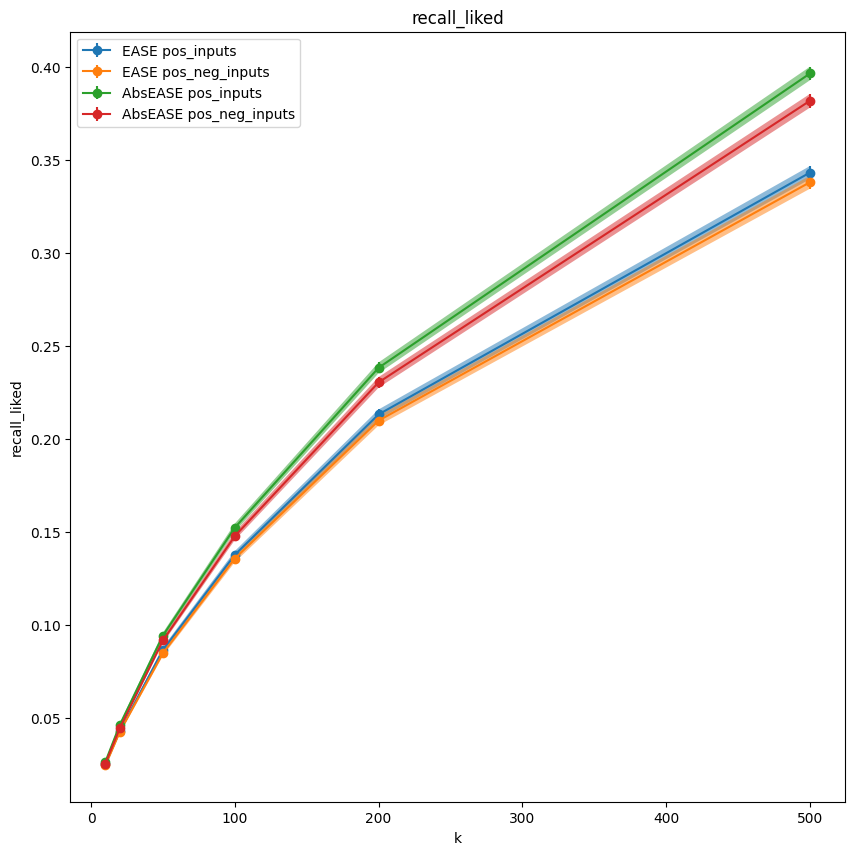

In [5]:
# recall liked
plot_results(beeradvocate_results_df, "recall_liked")

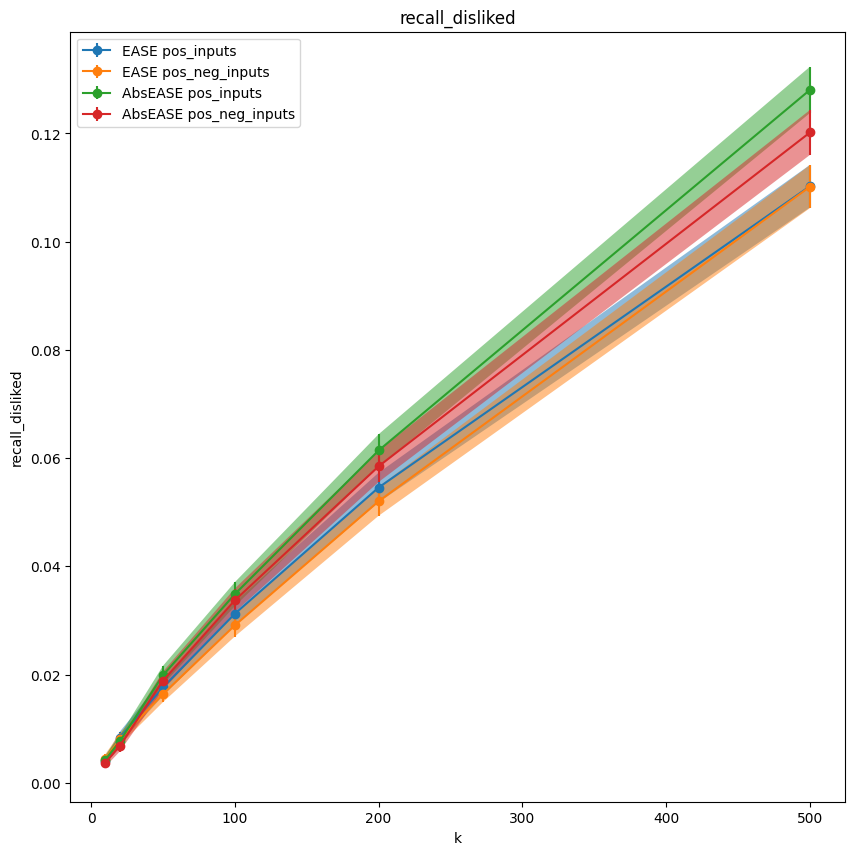

In [6]:
# recall disliked
plot_results(beeradvocate_results_df, "recall_disliked")

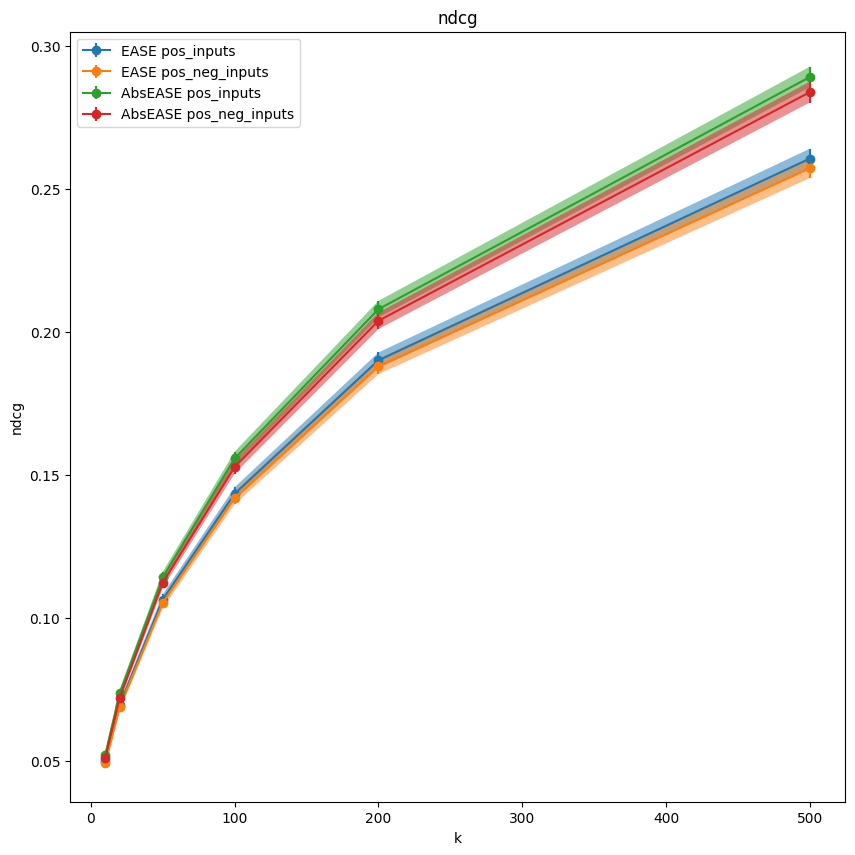

In [7]:
# ndcg
plot_results(beeradvocate_results_df, "ndcg")

# MovieLens

In [8]:
results_file_movielens = "resultsMovieLens.txt"

movielens_results_df = read_results(results_file_movielens)

movielens_results_df

,model,input,metric,k,mean,se
0,EASE,pos_inputs,recall_liked,10,0.027368,0.000286
1,EASE,pos_inputs,recall_liked,20,0.047199,0.000376
2,EASE,pos_inputs,recall_liked,50,0.094315,0.000544
3,EASE,pos_inputs,recall_liked,100,0.154522,0.000737
4,EASE,pos_inputs,recall_liked,200,0.243646,0.001005
...,...,...,...,...,...,...
1,AbsEASE,pos_neg_inputs,ndcg,20,0.054213,0.000458
2,AbsEASE,pos_neg_inputs,ndcg,50,0.082842,0.000577
3,AbsEASE,pos_neg_inputs,ndcg,100,0.114041,0.000715
4,AbsEASE,pos_neg_inputs,ndcg,200,0.154895,0.000911


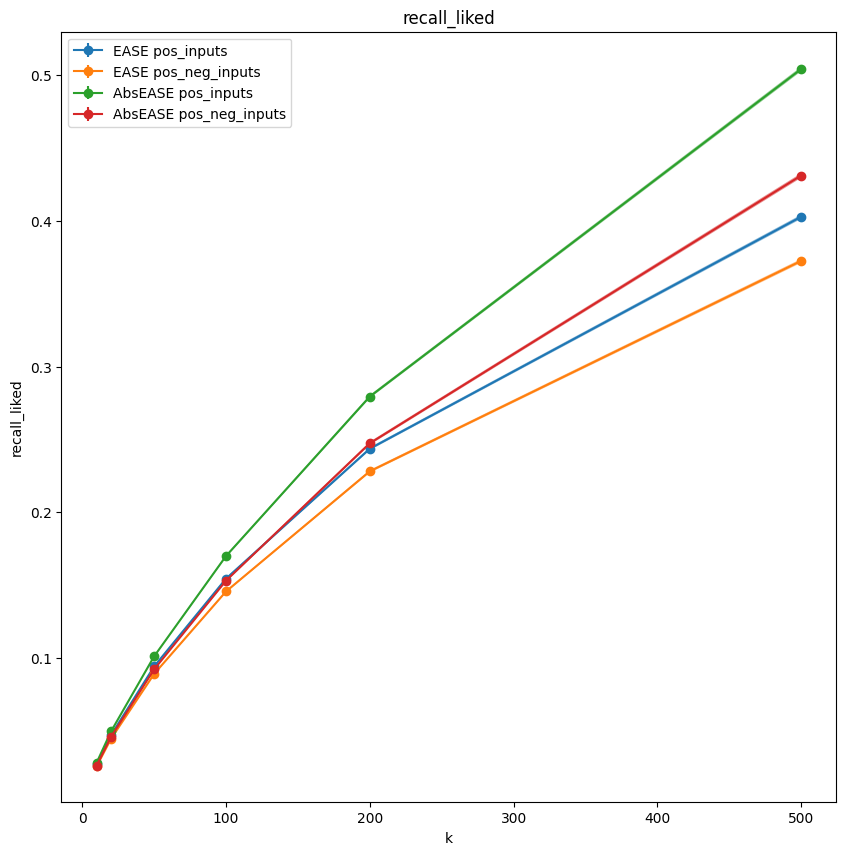

In [9]:
# recall liked
plot_results(movielens_results_df, "recall_liked")

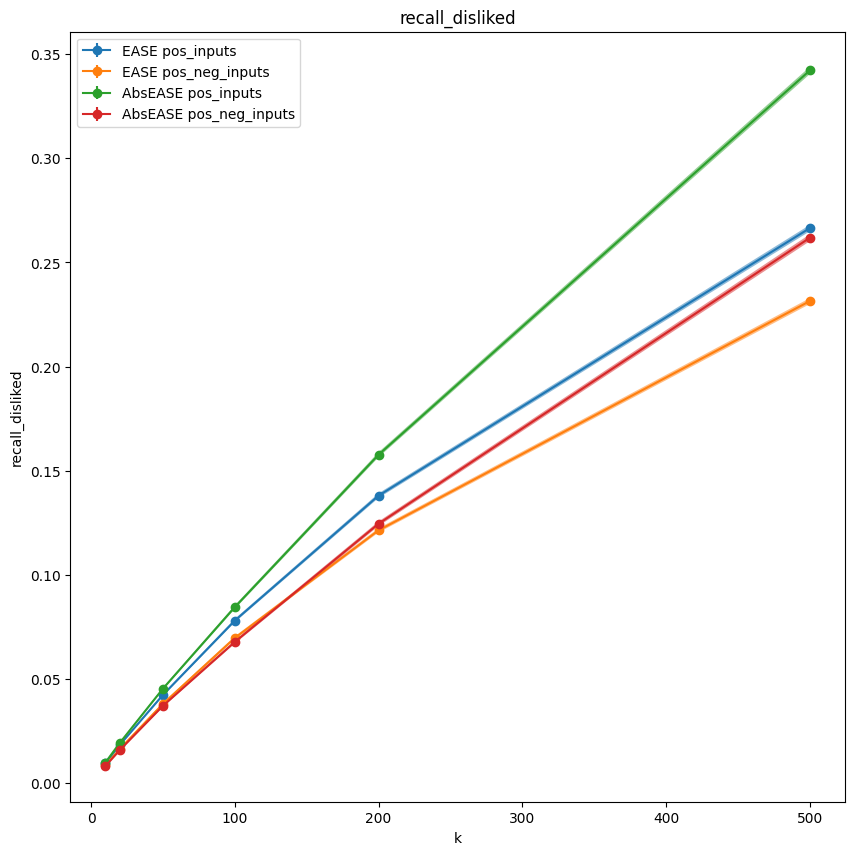

In [10]:
# recall disliked
plot_results(movielens_results_df, "recall_disliked")

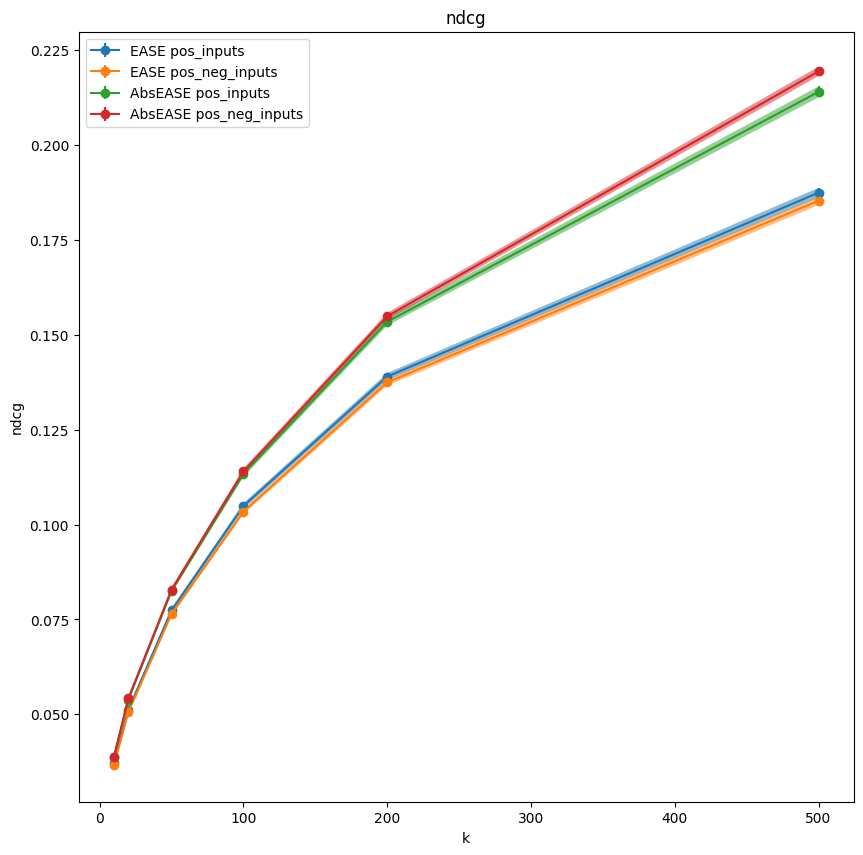

In [11]:
# ndcg
plot_results(movielens_results_df, "ndcg")